# LDA-SVM

In [19]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from confusion_matrix import confusion_matrix

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/fault_all_noise_67.csv")
test_data = pd.read_csv("../ValidationData/neodata/fault_all_noise_67.csv")

Text(0.5, 1.0, 'Training data')

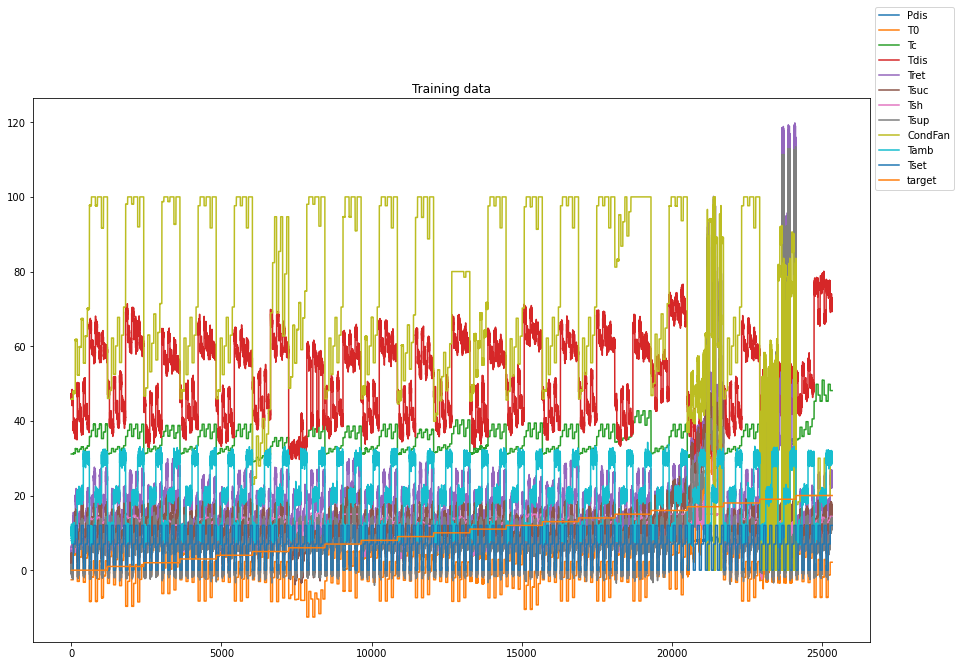

In [21]:
fig, axs = plt.subplots(figsize=(15,10))

axs.plot(train_data)
plt.legend(train_data.keys(), bbox_to_anchor=(1, 1), loc="center left")
plt.title('Training data')

In [22]:
#standardization
standardize = True

if standardize:
    import standardization as sd

    # Normalization / conditioning
    standardizer = sd.standardization(train_data,'target')

    trn = standardizer.transform(train_data).drop('target',axis=1)
    tst = standardizer.transform(test_data).drop('target',axis=1)
else:
    trn = train_data.drop('target',axis=1)
    tst = test_data.drop('target',axis=1)

targets = train_data['target'].unique().tolist()
labels_trn = train_data['target']
labels_tst = test_data['target']

trn

,Pdis,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,Tamb,Tset
0,-1.032494,-0.511047,-1.088671,-0.356538,-0.979821,-1.115124,-1.154178,-0.792657,-1.038352,-1.395102,-1.286817
1,-1.031986,-0.511334,-1.088093,-0.392249,-0.986315,-0.816657,-1.153514,-0.588536,-1.037461,-1.152741,-1.286817
2,-1.032595,-0.510996,-1.088786,-0.305495,-0.936532,-1.103815,-1.154308,-0.682936,-1.038529,-1.246715,-1.286817
3,-1.032755,-0.510917,-1.088969,-0.313549,-0.846477,-0.981532,-1.154513,-0.753920,-1.038810,-1.410227,-1.286817
4,-1.033006,-0.510801,-1.089255,-0.365188,-1.012106,-1.145663,-1.154832,-0.765365,-1.039250,-1.258335,-1.286817
...,...,...,...,...,...,...,...,...,...,...,...
25321,3.990764,0.066492,3.690410,1.815444,0.253337,0.407120,0.957731,0.289417,-1.654864,1.181980,1.151363
25322,3.989952,0.066902,3.689752,1.945870,0.366780,0.445585,0.957077,0.206907,-1.654864,1.169470,1.151363
25323,3.989794,0.066986,3.689624,1.788687,0.426260,0.405650,0.956946,0.346351,-1.654864,1.177053,1.151363
25324,3.989811,0.066977,3.689638,1.797973,0.450782,0.595406,0.956960,0.184554,-1.654864,1.345689,1.151363


# LDA    

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(n_components=5)
clf.fit(trn,labels_trn)
LDA = clf.transform(trn)

LDA_tst = clf.transform(tst)

LDA

array([[ 1.11046666e-01, -3.18885504e-01, -4.63889085e-01,
        -7.78542939e-02, -2.80658691e-02],
       [-1.09516688e-02,  6.14198172e-02, -3.76340325e-01,
         1.45010326e-01,  1.40512138e-01],
       [ 3.24507396e-02, -3.26901829e-01, -7.18892117e-01,
        -1.30175132e-01,  3.72172572e-02],
       ...,
       [ 1.11335238e+01, -1.74299836e+00,  4.26214888e-01,
        -4.51519053e-01,  1.52666300e+00],
       [ 1.12074652e+01, -1.95999772e+00,  4.65704000e-01,
        -8.02753884e-01,  1.37159539e+00],
       [ 1.11608242e+01, -1.63950068e+00,  4.76471653e-01,
        -6.47658508e-01,  1.44002004e+00]])

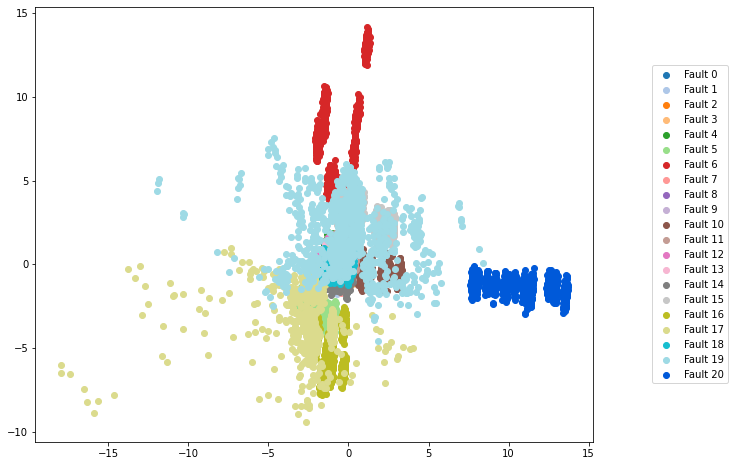

In [24]:
import plot_functions as pf

pf.plot_transformation(pd.DataFrame(LDA).assign(target=train_data['target']),'LDA_data.pdf','target',True,figsize=(10,8))

# SVM

In [25]:
from sklearn import svm

clf_svm = svm.SVC( C=1000, decision_function_shape="ovo",gamma=0.01,verbose=True)#kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.01)
clf_svm.fit(LDA, labels_trn)


[LibSVM]

SVC(C=1000, decision_function_shape='ovo', gamma=0.01, verbose=True)

In [26]:
predict = clf_svm.predict(LDA)
predict

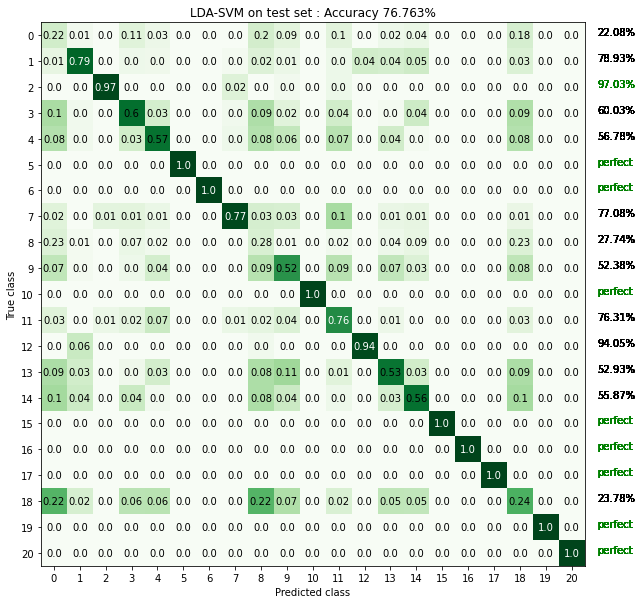

In [27]:
numbers = targets
truth = labels_trn

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict,truth):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA-SVM on test set',save_fig_name='PDF/LDA-SVM confusion matrix.pdf')
pass

In [28]:
predict_tst = clf_svm.predict(LDA_tst)
predict_tst


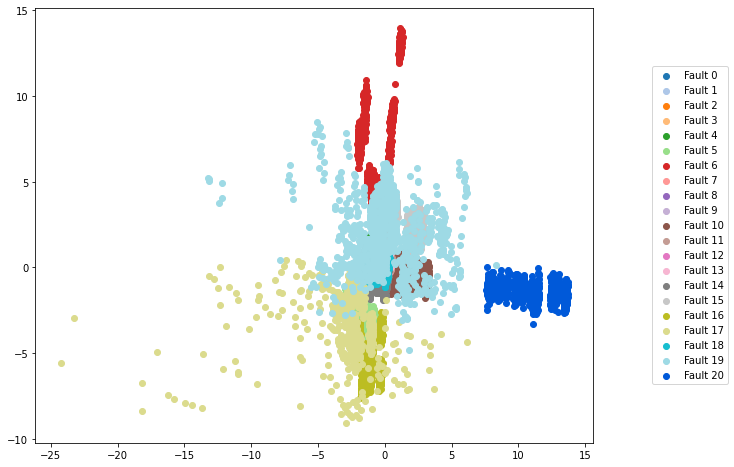

In [29]:
pf.plot_transformation(pd.DataFrame(LDA_tst).assign(target=test_data['target']),'LDA_val.pdf','target',True,figsize=(10,8))

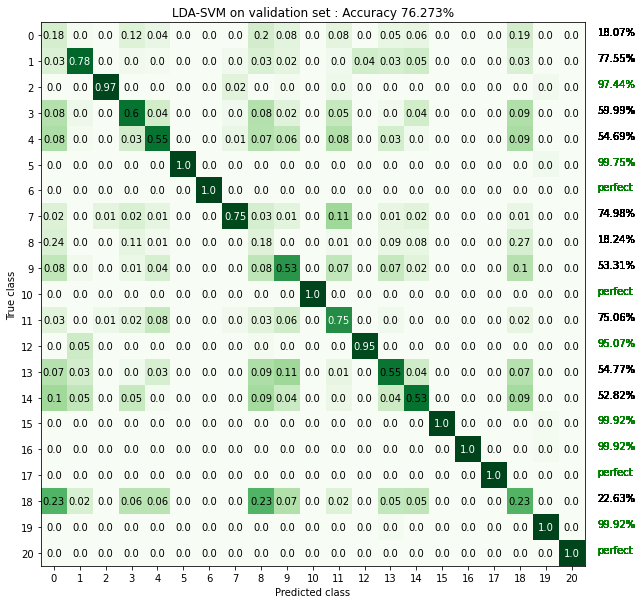

In [30]:
numbers = targets
truth = labels_tst

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict_tst,truth):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA-SVM on validation set',save_fig_name='PDF/LDA-SVM confusion matrix Validation.pdf')
pass

# LDA-SVM
Dataset: fault_all_noise_67.csv<br>
Standardized to mean 0 variance 1 (our implementation)<br>
LDA reduced to 5 dimensions (sklearn)<br>
SVM: C = 1000 gamma = 0.01 decision function = 'ovo'<br>

Accuracy on training set:   76.763%     false positive: 77.92%<br>
Accuracy on test set:       76.273%     false positive: 81.93%
